In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
import numpy as np

In [3]:
from glob import glob

In [6]:
def aggregate(maps):
    hpmap = np.zeros(12*256*256)

    for mapi in maps:
        hmapi = hp.read_map(mapi, verbose=False)
        nonan = ~np.isnan(hmapi)
        hpmap[nonan] += hmapi[nonan]
        print(np.percentile(hmapi[nonan], [0, 100]))

    hpmap[hpmap==0.] = np.nan    
    return hpmap

In [4]:
## NN ts
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ts/nn_plain_ts_*/nn-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
#hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/nn-weights-ts-v0.3hp256.fits', nnts, fits_IDL=False)

## NN CCD
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ccd/nn_plain_ccd_*/nn-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
#hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/nn-weights-ccd-v0.3hp256.fits', nnts, fits_IDL=False)


# lin ccd
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ccd/mult_ccd_*/lin-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
# hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/lin-weights-ccd-v0.3hp256.fits', nnts, fits_IDL=False)

# lin ts
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ts/mult_ts_*/lin-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
# hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/lin-weights-ts-v0.3hp256.fits', nnts, fits_IDL=False)

In [19]:
ls /home/mehdi/data/formehdi/0.3/

lin-weights-ccd-v0.3hp256.fits  regression_bmzls_ccd/   regression_decals_ccd/
lin-weights-ts-v0.3hp256.fits   regression_bmzls_ts/    regression_decals_ts/
nn-weights-ccd-v0.3hp256.fits   regression_decaln_ccd/
nn-weights-ts-v0.3hp256.fits    regression_decaln_ts/


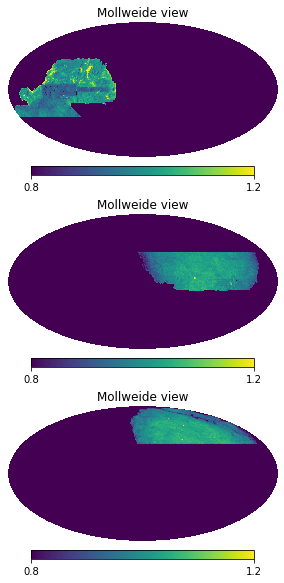

In [20]:
plt.figure(figsize=(8, 10))
for i,mapi in enumerate(maps):
    plt.subplot(311+i)
    dmapi = hp.read_map(mapi, verbose=False)
    hp.mollview(dmapi, hold=True, min=0.8, max=1.2, rot=-89)